In [1]:
import pandas as pd
from openai import OpenAI
from dotenv import load_dotenv
import time
import argparse
import csv
import os

from _0_prepare_tasks import clean_csv
from _1_translate_tasks import translate_csv
from _2_solve_tasks import solve_tasks
from _3_technical_terms import extract_technical_terms
from _4_evaluate_solution import evaluate_solutions
from _5_cross_lang_validation import compare_results

## Data collection

#### Cleaning exercises list file

In [2]:
input_exercises = "topic_areas.csv"
cleaned_exercises = "topic_areas_cleaned.csv"

clean_csv(input_exercises, cleaned_exercises)

print(f"Cleaned exercises saved to {cleaned_exercises}")

Cleaned exercises saved to topic_areas_cleaned.csv


### Translate exercises to German and Arabic

In [3]:
translated_exercises_de = "topic_areas_cleaned_de.csv"
translated_exercises_ar = "topic_areas_cleaned_ar.csv"

**German translation**

In [4]:
translate_csv(cleaned_exercises, translated_exercises_de, target_language="German")
print(f"Translated tasks to German saved to {translated_exercises_de}")

Translating exercises from English to German...
Translation to German complete. CSV file saved as: topic_areas_cleaned_de.csv.
Translated tasks to German saved to topic_areas_cleaned_de.csv


**Arabic translation**

In [5]:
translate_csv(cleaned_exercises, translated_exercises_ar, target_language="Arabic")
print(f"Translated tasks to Arabic saved to {translated_exercises_ar}")

Translating exercises from English to Arabic...
Translation to Arabic complete. CSV file saved as: topic_areas_cleaned_ar.csv.
Translated tasks to Arabic saved to topic_areas_cleaned_ar.csv


## Solving Exercises

In [4]:
solved_exercises_en = "topic_areas_solutions_en.csv"
solved_exercises_de = "topic_areas_solutions_de.csv"
solved_exercises_ar = "topic_areas_solutions_ar.csv"

In [5]:
def show_results_overview(df, model="gpt-4o-mini"):
    for index, row in df.iterrows():
        if index > 3:
            break;
        print(f"Topic Area: {row['Topic Area']}")
        print(f"Topic: {row['Topic']}")
        print(f"Progress Level: {row['Progress Level']}")
        print(f"Exercise: {row['Exercise']}")
        print()
        print(f"gpt-4o solution:")
        print(f"{row[f"{model} solution"]}")
        print(f"--------------------------\n")

English Solutions:

In [6]:
solve_tasks(cleaned_exercises, solved_exercises_en)
print(f"Solved tasks in English saved to {solved_exercises_en}")

df_en = pd.read_csv(solved_exercises_en)
print(df_en.head())

Solving task 1: Count objects up to 20
Solving task 2: Write 15 in tens and ones
Solving task 3: Write 234 in expanded form
Solving task 4: Show ½ with a fraction bar
Solving task 5: Express 3.75 as a fraction
Solving task 6: Convert 27 (base 10) to base 2
Solving task 7: Plot negative numbers on a line
Solving task 8: Illustrate 3/5 as decimal and percent
Solving task 9: Rewrite 2.4×10³ in standard form
Solving task 10: Represent 125 in binary
Solving task 11: Change 5¼ to improper fraction
Solving task 12: Plot ¾, √2, –1.5 on a line
Solving task 13: Compare decimal/binary/hex
Solving task 14: Evaluate best representations in context
Solving task 15: Compare two-digit numbers
Solving task 16: Place 5 numbers on a number line
Solving task 17: Order fractions 1/2, 2/3, 3/4
Solving task 18: Sort decimals 0.2, 0.15, 0.35
Solving task 19: Round 345.67 to nearest whole/tenth
Solving task 20: Explain ordering negative numbers
Solving task 21: Arrange decimals/fractions/percents
Solving task 

In [7]:
df_en = pd.read_csv(solved_exercises_en)

show_results_overview(df_en)

Topic Area: Zahlen und Operationen
Topic: Zahlen auffassen und darstellen
Progress Level: B
Exercise: Count objects up to 20

gpt-4o solution:
To solve the task of counting objects up to 20, you can follow these steps:

1. **Gather Objects**: Start by collecting the objects you want to count. These could be anything—like toys, blocks, fruits, etc.

2. **Organize the Objects**: If the objects are in a mixed pile, it might be helpful to organize them into a line or a group. This makes counting easier and helps ensure you don't skip any objects.

3. **Start Counting**: Use a systematic approach to count each object:
   - Begin at one end of the line or group of objects.
   - For each object, say the next number aloud (1, 2, 3, etc.) and point to or touch each object as you count it. This practice helps keep track of what you’ve already counted.

4. **Reach 20**: Continue counting until you reach the number 20. If you were counting up to 20 total, stop when you reach that number. If you ha

German Solutions:

In [8]:
solve_tasks(translated_exercises_de, solved_exercises_de)
print(f"Solved tasks in German saved to {solved_exercises_de}")

Solving task 1: Zähle Objekte bis 20
Solving task 2: Schreibe 15 in Zehnern und Einern.
Solving task 3: Schreibe 234 in erweiterter Form.
Solving task 4: Zeige ½ mit einem Bruchstrich.
Solving task 5: Drücke 3,75 als Bruch aus.
Solving task 6: Konvertieren Sie 27 (Basis 10) in Basis 2.
Solving task 7: Zahlen unter Null auf einer Linie darstellen.
Solving task 8: Stellen Sie 3/5 als Dezimalzahl und Prozentsatz dar.
Solving task 9: The equivalent German translation for the exercise description is:

"Schreibe 2,4×10³ in der normalen Dezimalschreibweise um."
Solving task 10: Stellen Sie 125 im Binärsystem dar.
Solving task 11: Translate the following exercise description from English to German: Change 5¼ to improper fraction

Ändere 5¼ in einen unechten Bruch.
Solving task 12: Zeichne ¾, √2, –1.5 auf einer Linie.
Solving task 13: Vergleiche Dezimal/Binär/Hexadezimal
Solving task 14: Bewerte die besten Darstellungen im Kontext.
Solving task 15: Vergleiche zweistellige Zahlen.
Solving task 1

In [9]:
df_de = pd.read_csv(solved_exercises_de)

show_results_overview(df_de)

Topic Area: Zahlen und Operationen
Topic: Zahlen auffassen und darstellen
Progress Level: B
Exercise: Zähle Objekte bis 20

gpt-4o solution:
Um die Aufgabe "Zähle Objekte bis 20" zu lösen, gehst du folgendermaßen vor:

1. **Objekte identifizieren**: Stelle sicher, dass du eine Gruppe von Objekten hast, die du zählen möchtest. Das können beispielsweise Spielzeugautos, Bücher oder Äpfel sein.

2. **Zählreihenfolge festlegen**: Beginne mit der Zahl 1 und zähle nacheinander bis zur Zahl 20. Du kannst laut zählen oder die Zahlen aufschreiben.

3. **Zählen**: Fange an, die Objekte der Reihe nach zu zählen:
   - Berühre oder tippe auf jedes Objekt, während du die Zahlen nennst, um sicherzustellen, dass du nichts überspringst oder doppelt zählst.
   - Sage dabei: "1, 2, 3, ..., 20".

4. **Überprüfung**: Wenn du bei 20 angekommen bist, überprüfe, ob tatsächlich 20 Objekte gezählt wurden. Wenn du dir unsicher bist, kannst du die Objekte erneut zählen.

5. **Zusätzliche Übung (optional)**: Um die

Arabic Solutions:

In [10]:
solve_tasks(translated_exercises_ar, solved_exercises_ar)
print(f"Solved tasks in Arabic saved to {solved_exercises_ar}")

Solving task 1: عد الأشياء حتى 20
Solving task 2: اكتب العدد 15 باستخدام العشرات والآحاد.
Solving task 3: اكتب العدد 234 في الصورة الموسعة
Solving task 4: اعرض ½ باستخدام شريط الكسر.
Solving task 5: اكتب 3.75 ككسر.
Solving task 6: قم بتحويل العدد 27 من النظام العشري (الأساس 10) إلى النظام الثنائي (الأساس 2).
Solving task 7: ارسم الأعداد السالبة على خط.
Solving task 8: قم بتوضيح \( \frac{3}{5} \) كرقم عشري ونسبة مئوية.
Solving task 9: إعادة كتابة 2.4×10³ بالصيغة العادية.
Solving task 10: تمثيل العدد 125 في النظام الثنائي.
Solving task 11: حوِّل 5¼ إلى كسر غير حقيقي.
Solving task 12: ضع النقاط ¾، √2، -1.5 على خط الأعداد.
Solving task 13: قارن بين النظام العشري/الثنائي/السداسي عشر.
Solving task 14: تقييم أفضل التمثيلات في السياق
Solving task 15: قارن الأعداد المكونة من رقمين.
Solving task 16: ضع 5 أرقام على خط الأعداد.
Solving task 17: رتب الكسور 1/2، 2/3، 3/4
Solving task 18: رتب الأعداد العشرية 0.2، 0.15، 0.35.
Solving task 19: تقريب 345.67 إلى أقرب عدد صحيح/عشر.
Solving task 20: اشرح ت

In [11]:
df_ar = pd.read_csv(solved_exercises_ar)

show_results_overview(df_ar)

Topic Area: Zahlen und Operationen
Topic: Zahlen auffassen und darstellen
Progress Level: B
Exercise: عد الأشياء حتى 20

gpt-4o solution:
لحل مهمة "عد الأشياء حتى 20"، يمكنك اتباع الخطوات التالية:

1. **جمع الأشياء**: اجمع مجموعة من العناصر التي ترغب في عدها، مثل الألعاب، الفواكه، أو أي شي آخر ترغب في عدّه.

2. **البدء بالعد**: ابدأ بالعد واحدًا تلو الآخر. يمكنك القول "واحد، اثنان، ثلاثة، ..." إلى أن تصل إلى الرقم 20.

3. **استخدام الأصابع**: يمكنك استخدام أصابعك للإشارة إلى كل عنصر أثناء العد، مما يساعدك على تتبع العدد بشكل أفضل.

4. **التحقق من العد**: بعد أن تصل إلى 20، قد ترغب في مراجعة الأشياء التي عدتها للتأكد من أنك لم تفوت أي عنصر.

5. **الأدوات البصرية**: إذا كنت تفضل، يمكنك استخدام أدوات بصرية مثل العدادات أو اللوحات التي تساعد في العد (مثل العدادات المرتبطة بالألوان).

هذه الطريقة ستساعدك في العد حتى الرقم 20 بطريقة منهجية وواضحة.
--------------------------

Topic Area: Zahlen und Operationen
Topic: Zahlen auffassen und darstellen
Progress Level: B
Exercise: اكتب العدد 15 با

## Extracting technical terms

In [12]:
terms_en = "technical_terms_en.csv"
terms_de = "technical_terms_de.csv"
terms_ar = "technical_terms_ar.csv"

English terms

In [14]:
extract_technical_terms(cleaned_exercises, terms_en, target_language="en")
print(f"Extracted technical terms in English saved to {terms_en}")

Extracting technical terms for task 1: Count objects up to 20
Extracting technical terms for task 2: Write 15 in tens and ones
Extracting technical terms for task 3: Write 234 in expanded form
Extracting technical terms for task 4: Show ½ with a fraction bar
Extracting technical terms for task 5: Express 3.75 as a fraction
Extracting technical terms for task 6: Convert 27 (base 10) to base 2
Extracting technical terms for task 7: Plot negative numbers on a line
Extracting technical terms for task 8: Illustrate 3/5 as decimal and percent
Extracting technical terms for task 9: Rewrite 2.4×10³ in standard form
Extracting technical terms for task 10: Represent 125 in binary
Extracting technical terms for task 11: Change 5¼ to improper fraction
Extracting technical terms for task 12: Plot ¾, √2, –1.5 on a line
Extracting technical terms for task 13: Compare decimal/binary/hex
Extracting technical terms for task 14: Evaluate best representations in context
Extracting technical terms for task

German terms

In [15]:
extract_technical_terms(cleaned_exercises, terms_de, target_language="de")
print(f"Extracted technical terms in German saved to {terms_de}")

Extracting technical terms for task 1: Count objects up to 20
Extracting technical terms for task 2: Write 15 in tens and ones
Extracting technical terms for task 3: Write 234 in expanded form
Extracting technical terms for task 4: Show ½ with a fraction bar
Extracting technical terms for task 5: Express 3.75 as a fraction
Extracting technical terms for task 6: Convert 27 (base 10) to base 2
Extracting technical terms for task 7: Plot negative numbers on a line
Extracting technical terms for task 8: Illustrate 3/5 as decimal and percent
Extracting technical terms for task 9: Rewrite 2.4×10³ in standard form
Extracting technical terms for task 10: Represent 125 in binary
Extracting technical terms for task 11: Change 5¼ to improper fraction
Extracting technical terms for task 12: Plot ¾, √2, –1.5 on a line
Extracting technical terms for task 13: Compare decimal/binary/hex
Extracting technical terms for task 14: Evaluate best representations in context
Extracting technical terms for task

Arabic terms

In [16]:
extract_technical_terms(cleaned_exercises, terms_ar, target_language="ar")
print(f"Extracted technical terms in Arabic saved to {terms_ar}")

Extracting technical terms for task 1: Count objects up to 20
Extracting technical terms for task 2: Write 15 in tens and ones
Extracting technical terms for task 3: Write 234 in expanded form
Extracting technical terms for task 4: Show ½ with a fraction bar
Extracting technical terms for task 5: Express 3.75 as a fraction
Extracting technical terms for task 6: Convert 27 (base 10) to base 2
Extracting technical terms for task 7: Plot negative numbers on a line
Extracting technical terms for task 8: Illustrate 3/5 as decimal and percent
Extracting technical terms for task 9: Rewrite 2.4×10³ in standard form
Extracting technical terms for task 10: Represent 125 in binary
Extracting technical terms for task 11: Change 5¼ to improper fraction
Extracting technical terms for task 12: Plot ¾, √2, –1.5 on a line
Extracting technical terms for task 13: Compare decimal/binary/hex
Extracting technical terms for task 14: Evaluate best representations in context
Extracting technical terms for task

## Evaluating Solutions

In [17]:
evaluations_en = "topic_areas_evaluations_en.csv"
evaluations_de = "topic_areas_evaluations_de.csv"
evaluations_ar = "topic_areas_evaluations_ar.csv"

In [18]:
import importlib
import _4_evaluate_solution

importlib.reload(_4_evaluate_solution)
from _4_evaluate_solution import evaluate_solutions

In [19]:
evaluate_solutions(solved_exercises_en, terms_en, evaluations_en)
print(f"Evaluation of solutions in English saved to {evaluations_en}")

Evaluating solution for task 1: Count objects up to 20
Evaluating solution for task 2: Write 15 in tens and ones
Evaluating solution for task 3: Write 234 in expanded form
Evaluating solution for task 4: Show ½ with a fraction bar
Evaluating solution for task 5: Express 3.75 as a fraction
Evaluating solution for task 6: Convert 27 (base 10) to base 2
Evaluating solution for task 7: Plot negative numbers on a line
Evaluating solution for task 8: Illustrate 3/5 as decimal and percent
Evaluating solution for task 9: Rewrite 2.4×10³ in standard form
Evaluating solution for task 10: Represent 125 in binary
Evaluating solution for task 11: Change 5¼ to improper fraction
Evaluating solution for task 12: Plot ¾, √2, –1.5 on a line
Evaluating solution for task 13: Compare decimal/binary/hex
Evaluating solution for task 14: Evaluate best representations in context
Evaluating solution for task 15: Compare two-digit numbers
Evaluating solution for task 16: Place 5 numbers on a number line
Evaluati

In [20]:
evaluate_solutions(solved_exercises_de, terms_de, evaluations_de)
print(f"Evaluation of solutions in German saved to {evaluations_de}")

Evaluating solution for task 1: Zähle Objekte bis 20
Evaluating solution for task 2: Schreibe 15 in Zehnern und Einern.
Evaluating solution for task 3: Schreibe 234 in erweiterter Form.
Evaluating solution for task 4: Zeige ½ mit einem Bruchstrich.
Evaluating solution for task 5: Drücke 3,75 als Bruch aus.
Evaluating solution for task 6: Konvertieren Sie 27 (Basis 10) in Basis 2.
Evaluating solution for task 7: Zahlen unter Null auf einer Linie darstellen.
Evaluating solution for task 8: Stellen Sie 3/5 als Dezimalzahl und Prozentsatz dar.
Evaluating solution for task 9: The equivalent German translation for the exercise description is:

"Schreibe 2,4×10³ in der normalen Dezimalschreibweise um."
Evaluating solution for task 10: Stellen Sie 125 im Binärsystem dar.
Evaluating solution for task 11: Translate the following exercise description from English to German: Change 5¼ to improper fraction

Ändere 5¼ in einen unechten Bruch.
Evaluating solution for task 12: Zeichne ¾, √2, –1.5 auf 

In [21]:
evaluate_solutions(solved_exercises_ar, terms_ar, evaluations_ar)
print(f"Evaluation of solutions in Arabic saved to {evaluations_ar}")

Evaluating solution for task 1: عد الأشياء حتى 20
Evaluating solution for task 2: اكتب العدد 15 باستخدام العشرات والآحاد.
Evaluating solution for task 3: اكتب العدد 234 في الصورة الموسعة
Evaluating solution for task 4: اعرض ½ باستخدام شريط الكسر.
Evaluating solution for task 5: اكتب 3.75 ككسر.
Evaluating solution for task 6: قم بتحويل العدد 27 من النظام العشري (الأساس 10) إلى النظام الثنائي (الأساس 2).
Evaluating solution for task 7: ارسم الأعداد السالبة على خط.
Evaluating solution for task 8: قم بتوضيح \( \frac{3}{5} \) كرقم عشري ونسبة مئوية.
Evaluating solution for task 9: إعادة كتابة 2.4×10³ بالصيغة العادية.
Evaluating solution for task 10: تمثيل العدد 125 في النظام الثنائي.
Evaluating solution for task 11: حوِّل 5¼ إلى كسر غير حقيقي.
Evaluating solution for task 12: ضع النقاط ¾، √2، -1.5 على خط الأعداد.
Evaluating solution for task 13: قارن بين النظام العشري/الثنائي/السداسي عشر.
Evaluating solution for task 14: تقييم أفضل التمثيلات في السياق
Evaluating solution for task 15: قارن ال

## Results Comparisons

In [22]:
files = {
    "en": evaluations_en,
    "de": evaluations_de,
    "ar": evaluations_ar,
}

In [23]:
import importlib
import _5_cross_lang_validation

importlib.reload(_5_cross_lang_validation)
from _5_cross_lang_validation import compare_results

In [24]:
cross_validation_results = compare_results(files)


=== Language with Highest Average for Each Metric ===

Problem Understanding (Comprehension)                                      de
Clarity and Step-by-Step Explanation                                       de
Accuracy of Process (Correctness of Steps)                                 en
Correctness of Final Answer                                                en
Learning Appropriateness (Is the Explanation Suitable for Learners?)       en
Generalization (Can the Learner Apply This Method to Similar Problems?)    en
Technical Terms Explanation                                                de
Addressing Common Errors                                                   en
Appropriateness Based on Progress Level (Grade)                            de
dtype: object


In [25]:
comparison_results = pd.read_csv('comparison_results.csv')
highest_averages = pd.read_csv('highest_averages.csv')

{'en': [1.968944099378882, 1.9968944099378882, 1.9968944099378882, 1.9937888198757765, 1.9968944099378882, 1.9968944099378882, 1.9968944099378882, 1.9627329192546583, 1.9813664596273293], 'de': [1.9813664596273293, 2.0, 1.9968944099378882, 1.9875776397515528, 1.9937888198757765, 1.9968944099378882, 2.0, 1.9472049689440993, 1.9968944099378882], 'ar': [1.9440993788819876, 1.9875776397515528, 1.984472049689441, 1.984472049689441, 1.9875776397515528, 1.9875776397515528, 1.9875776397515528, 1.9254658385093169, 1.9906832298136645]} ['Problem Understanding (Comprehension)', 'Clarity and Step-by-Step Explanation', 'Accuracy of Process (Correctness of Steps)', 'Correctness of Final Answer', 'Learning Appropriateness (Is the Explanation Suitable for Learners?)', 'Generalization (Can the Learner Apply This Method to Similar Problems?)', 'Technical Terms Explanation', 'Addressing Common Errors', 'Appropriateness Based on Progress Level (Grade)']


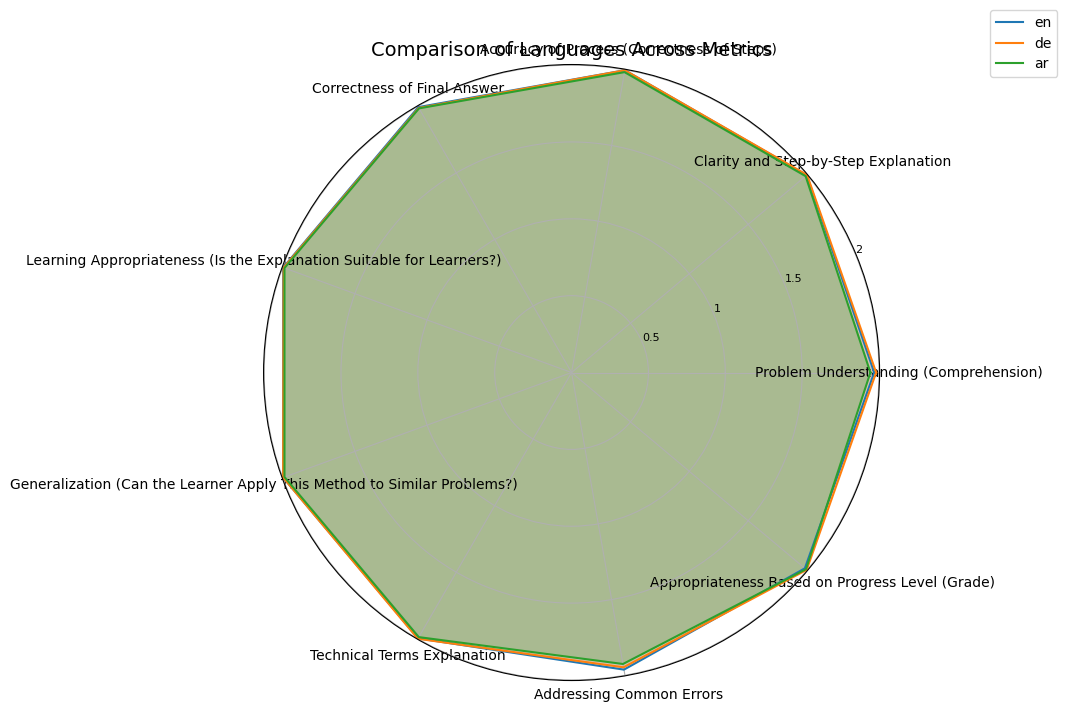

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Read data from CSV
file_path = "comparison_results.csv"
values = {}
languages = []
metrics = []

with open(file_path, 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Read the header row
    metrics = header[1:]  # Metrics are all columns except the first (language names)
    for row in reader:
        language = row[0]
        scores = list(map(float, row[1:]))
        values[language] = scores
        languages.append(language)

print(values, metrics)
        
# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for lang in languages:
    data = values[lang] + values[lang][:1]  # Close the circle
    ax.plot(angles, data, label=lang)
    ax.fill(angles, data, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=10)
ax.set_yticks([0.5, 1, 1.5, 2])
ax.set_yticklabels(['0.5', '1', '1.5', '2'], fontsize=8)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Comparison of Languages Across Metrics', fontsize=14)
plt.show()


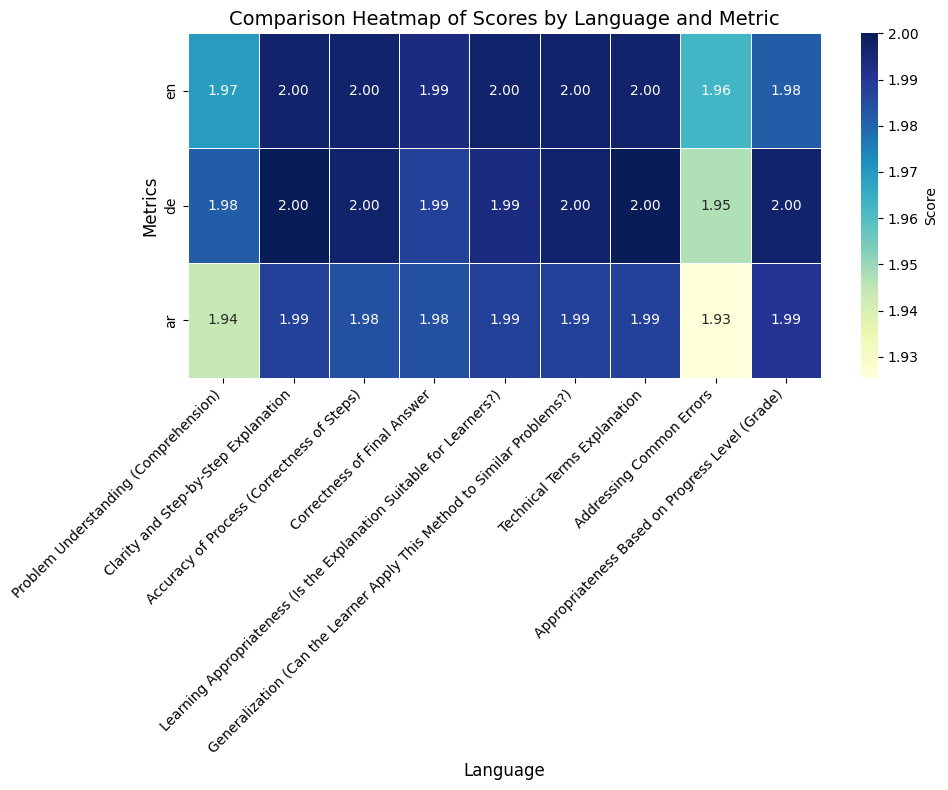

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("comparison_results.csv")

# Set the index of the DataFrame to the metrics column
data.set_index("Unnamed: 0", inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    data,
    annot=True,  # Show the values in each cell
    cmap="YlGnBu",  # Color palette
    fmt=".2f",  # Format the numbers to 2 decimal places
    linewidths=0.5,  # Add space between cells
    cbar_kws={'label': 'Score'}  # Label for the color bar
)

# Add labels and title
plt.title("Comparison Heatmap of Scores by Language and Metric", fontsize=14)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Metrics", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [95]:
import importlib
import _6_find_differently_performing_exercises

importlib.reload(_6_find_differently_performing_exercises)
from _6_find_differently_performing_exercises import find_differently_performing_exercises

result = find_differently_performing_exercises([evaluations_en, evaluations_de, evaluations_ar])

result.to_csv("most_different_exercises.csv", index=False)

In [96]:
pd.read_csv("most_different_exercises.csv").head()

,exercise,language_1,language_2,language_3,Total_Difference
0,exercise_268,2.000000,0.333333,2.000000,1.666667
1,exercise_210,1.888889,1.000000,2.000000,1.000000
2,exercise_69,2.000000,2.000000,1.333333,0.666667
3,exercise_111,2.000000,2.000000,1.333333,0.666667
4,exercise_98,2.000000,1.444444,2.000000,0.555556


In [97]:
def get_exercise_solution(index, solutions_en, solutions_de, solutions_ar, model='gpt-4o-mini'):
    # Ensure index is within the bounds of the dataframes
    if index < 0 or index > len(solutions_en):
        raise ValueError("Index is out of bounds for the solutions dataframes.")
    
    # Retrieve the exercise solutions from each language file at the given index
    solution_en = solutions_en.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in English
    solution_de = solutions_de.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in German
    solution_ar = solutions_ar.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in Arabic
    
    # Returning the exercise solutions as a dictionary
    return {
        'Exercise': solutions_en.iloc[index-1]['Exercise'],
        'English': solution_en,
        'German': solution_de,
        'Arabic': solution_ar
    }

In [98]:

# Example of usage:
index = 10  # Example index
sols_en = pd.read_csv(solved_exercises_en)
sols_de = pd.read_csv(solved_exercises_de)
sols_ar = pd.read_csv(solved_exercises_ar)
solutions = get_exercise_solution(index, sols_en, sols_de, sols_ar)
print(solutions['Exercise'])
print('---')
print(solutions['English'])
print('---')
print(solutions['German'])
print('---')
print(solutions['Arabic'])

Represent 125 in binary
---
To represent the decimal number 125 in binary, you can follow these steps:

### Method 1: Division by 2

1. **Divide the number by 2**: Take the number (125) and divide it by 2.
2. **Record the quotient and the remainder**: Note down the quotient and the remainder from each division.
3. **Repeat**: Continue dividing the quotient by 2 until the quotient is 0.
4. **Record the remainders**: The binary representation will be the sequence of remainders read in reverse (from the last remainder obtained to the first).

Here's how it looks in practice:

- **125 ÷ 2 = 62**, remainder **1**
- **62 ÷ 2 = 31**, remainder **0**
- **31 ÷ 2 = 15**, remainder **1**
- **15 ÷ 2 = 7**, remainder **1**
- **7 ÷ 2 = 3**, remainder **1**
- **3 ÷ 2 = 1**, remainder **1**
- **1 ÷ 2 = 0**, remainder **1**

Now, reading the remainders from bottom to top gives you:  
**1111101**

Therefore, **125 in binary is 1111101**.

### Method 2: Subtraction of Powers of Two

1. **Find the largest